# Apriori - Data Mining Project

# 18CSU080

AIM- To find associations between dishes served at a restraunt to enhance efficiency and profit.

SOURCE- KAGGLE

![title](rest.jpg)

## Importing the libraries

In [1]:
!pip install apyori

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

In [3]:
dataset = pd.read_csv('res1.csv', header = None)

In [4]:
dataset

,0,1,2,3,4,5,6,7,8
0,Plain Rice,chicken,,Special Fried Rice,Curry,Lamb,NaN,NaN,NaN
1,Plain Rice,egg curry,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chicken,coke,Special Fried Rice,Curry,prawn,NaN,NaN,NaN,NaN
3,Plain Rice,,prawn,Lamb,NaN,NaN,NaN,NaN,NaN
4,chicken,,Special Fried Rice,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4062,Plain Rice,Curry,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4063,Plain Rice,egg curry,,N.veg Biryani,prawn,Lamb,NaN,NaN,NaN
4064,Plain Rice,chicken,coke,Special Fried Rice,Curry,N.veg Biryani,Lamb,NaN,NaN
4065,egg curry,,coke,Special Fried Rice,N.veg Biryani,prawn,Lamb,NaN,NaN


In [76]:
df1=dataset.apply(pd.Series.value_counts)
df1

,0,1,2,3,4,5,6,7,8
,316.0,696.0,630.0,189.0,NaN,NaN,NaN,NaN,NaN
Curry,49.0,289.0,423.0,594.0,380.0,120.0,11.0,NaN,NaN
Lamb,NaN,101.0,190.0,264.0,405.0,439.0,309.0,91.0,12.0
N.veg Biryani,27.0,185.0,359.0,458.0,540.0,270.0,61.0,3.0,NaN
Plain Rice,1882.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Special Fried Rice,106.0,372.0,570.0,520.0,254.0,37.0,NaN,NaN,NaN
chicken,997.0,899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coke,193.0,508.0,651.0,426.0,78.0,NaN,NaN,NaN,NaN
egg curry,489.0,880.0,439.0,NaN,NaN,NaN,NaN,NaN,NaN
prawn,8.0,137.0,240.0,416.0,483.0,413.0,160.0,23.0,NaN


In [61]:
df1.drop(df1.head(1).index, inplace=True)
df1.fillna(0,inplace= True)
df1["sum"] = df1.sum(axis=1)

,0,1,2,3,4,5,6,7,8,sum
Curry,49.0,289.0,423.0,594.0,380.0,120.0,11.0,0.0,0.0,1866.0
Lamb,0.0,101.0,190.0,264.0,405.0,439.0,309.0,91.0,12.0,1811.0
N.veg Biryani,27.0,185.0,359.0,458.0,540.0,270.0,61.0,3.0,0.0,1903.0
Plain Rice,1882.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1882.0
Special Fried Rice,106.0,372.0,570.0,520.0,254.0,37.0,0.0,0.0,0.0,1859.0
chicken,997.0,899.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1896.0
coke,193.0,508.0,651.0,426.0,78.0,0.0,0.0,0.0,0.0,1856.0
egg curry,489.0,880.0,439.0,0.0,0.0,0.0,0.0,0.0,0.0,1808.0
prawn,8.0,137.0,240.0,416.0,483.0,413.0,160.0,23.0,0.0,1880.0


In [63]:
df1.to_csv('file1.csv') 

In [ ]:
df2=pd.read_csv('file1.csv')
df2

# VIZ..

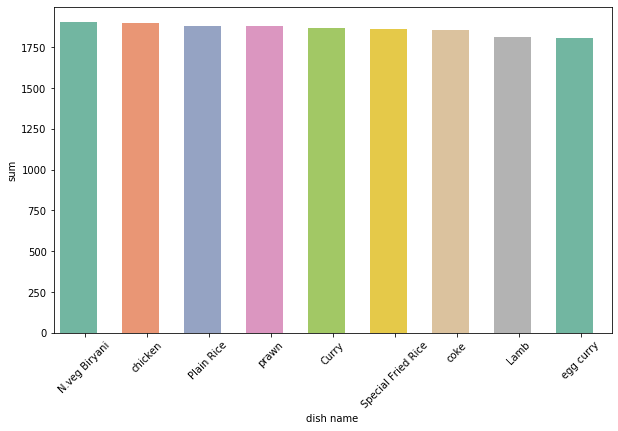

In [125]:
fig = plt.subplots(figsize=(10,6)) 
top = df2.sort_values('sum',ascending=False)
sns.barplot(x='dish name', y='sum', data=top, palette='Set2', Width=0.6)
plt.xticks(rotation=45) 
plt.show()   

Because of these type of results we need association rule mining to figure out the combinations of the dishes.

In [5]:
transactions = []
for i in range(0, 4067):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 9)])

In [6]:
transactions

[['Plain Rice',
  'chicken',
  ' ',
  'Special Fried Rice',
  'Curry',
  'Lamb',
  'nan',
  'nan',
  'nan'],
 ['Plain Rice', 'egg curry', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['chicken',
  'coke',
  'Special Fried Rice',
  'Curry',
  'prawn',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['Plain Rice', ' ', 'prawn', 'Lamb', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['chicken',
  ' ',
  'Special Fried Rice',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 [' ', 'prawn', 'Lamb', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['Plain Rice',
  'chicken',
  'egg curry',
  'Special Fried Rice',
  'Curry',
  'N.veg Biryani',
  'Lamb',
  'nan',
  'nan'],
 ['coke', 'prawn', 'Lamb', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['Plain Rice',
  ' ',
  'N.veg Biryani',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['egg curry',
  ' ',
  'coke',
  'Special Fried Rice',
  'Curry',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chicken',
  'N.veg Biryani',
  'prawn',
  'nan',
  'nan',
  'nan'

## Training the Apriori model on the dataset

In [18]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.214, min_confidence = 0.4, min_lift = 1.02, min_length = 2, max_length = 2)

### Displaying the first results coming directly from the output of the apriori function

In [19]:
results = list(rules)

In [20]:
results

[RelationRecord(items=frozenset({' ', 'N.veg Biryani'}), support=0.21514629948364888, ordered_statistics=[OrderedStatistic(items_base=frozenset({' '}), items_add=frozenset({'N.veg Biryani'}), confidence=0.47788093937738946, lift=1.0213041410656032), OrderedStatistic(items_base=frozenset({'N.veg Biryani'}), items_add=frozenset({' '}), confidence=0.4598003152916448, lift=1.0213041410656032)]),
 RelationRecord(items=frozenset({'Curry', 'N.veg Biryani'}), support=0.2232603884927465, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Curry'}), items_add=frozenset({'N.veg Biryani'}), confidence=0.4866023579849946, lift=1.03994313711244), OrderedStatistic(items_base=frozenset({'N.veg Biryani'}), items_add=frozenset({'Curry'}), confidence=0.4771413557540725, lift=1.03994313711244)]),
 RelationRecord(items=frozenset({'Curry', 'Special Fried Rice'}), support=0.21465453651340055, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Curry'}), items_add=frozenset({'Special Fried Ric

### Putting the results well organised into a Pandas DataFrame

In [21]:
def inspect(results):
    item1         = [tuple(result[2][0][0])[0] for result in results]
    item2         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(item1, item2, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['item1', 'item2', 'Support', 'Confidence', 'Lift'])

### Displaying the results sorted by descending confidence

In [22]:
resultsinDataFrame.nlargest(n = 15, columns = 'Confidence')

,item1,item2,Support,Confidence,Lift
6,N.veg Biryani,chicken,0.228178,0.487651,1.046032
1,Curry,N.veg Biryani,0.223260,0.486602,1.039943
15,egg curry,prawn,0.215884,0.485619,1.050540
4,Lamb,chicken,0.214900,0.482606,1.035211
3,Lamb,N.veg Biryani,0.214409,0.481502,1.029043
11,Special Fried Rice,chicken,0.218589,0.478214,1.025789
0,,N.veg Biryani,0.215146,0.477881,1.021304
9,Plain Rice,chicken,0.221047,0.477683,1.024651
12,Special Fried Rice,prawn,0.218097,0.477138,1.032192
14,chicken,prawn,0.220802,0.473629,1.024600


# CONCLUSIONS

1. N.veg biryani is the only dish that mostly sells by itself.

2. Chicken and prawn are most often bought with rice.

3. Coke only appears with n.veg biryani once, so this only asserts more to the fact that it is a standout dish which sells the most by itself.

4. Curry is also bought frequently with rice.

5. The only rare finding we get from this is that chciken and lamb, aand chicken and lamb are bought together very frequently even though they together do not qualify as a complete dish.

# RECOMMENDATIONS

1. First of all N.veg biryani should be made in bulk as it is the best seller for the restraunt

2. The items which are bought together can be offered as a combo deal to increase the sales of these items further.

3. So the efficient usage and stocking of the inventory will help the restraunt owners to increase their profits as less amount of food gets wasted.

4. Also efficiency would increase because owners would be aware of the most frequently bought dish and would not waste time while delivering the orders. This could help them expand the business for home delivery purposes too which will help further gro their profits.